In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
import pandas as pd
import ODIN
import scipy.io as sio
data_path = 'data/'

In [2]:
# functions for loading/saving data for .mat files
import scipy.io as sio

def save2mat(data, filename, key = 'data'):
    sio.savemat(filename, {key : data})
    return

def load4mat(filename, key = 'data'):
    return sio.loadmat(filename)[key]

In [3]:
# This stores the biological structure of the connectome
x_meta = pd.read_csv(data_path + 'LobeHemiMatrix.csv')
lobe_locations = list(x_meta["Lobe"])
hemi_locations = list(x_meta["Hemisphere"])


# The binary adjacency matrices
a = load4mat(data_path + 'A.mat')
n = a.shape[2]

In [4]:
# Fitting the model, calculating influence, and detecting outliers

outDetect = ODIN.ODIN(lam=0.001, maxiter=2000, tol=1e-6)
outDetect.fit_and_detect_outliers(a=a, lobes=lobe_locations, hemis=hemi_locations)

# Outliers and Inliers

out = outDetect.outliers
ins = np.sort(np.setdiff1d(np.arange(n), out))

---Estimating Model Parameters---
Estimated in 239 iteratations in 42.087 seconds.
---Calculating Influence Measures---
Calculated influence in 37.587 seconds.
---Thresholding Influence Measures---
ODIN finished in 80.266 seconds


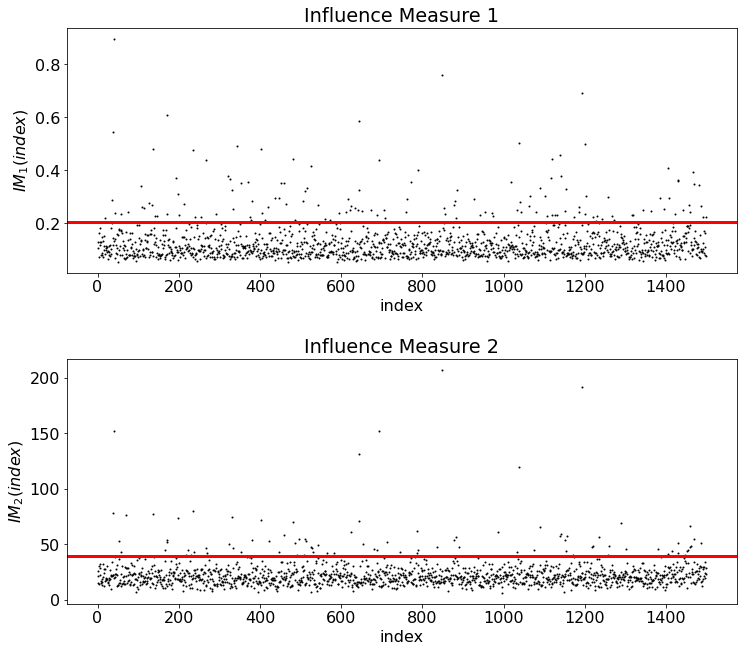

In [5]:
# Influence Plots

plt.rcParams["figure.figsize"] = (12, 10)
plt.rcParams.update({'font.size': 16})

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(bottom=0.1, top=0.9, hspace=0.35)

ax1.plot(np.arange(n), outDetect.im1, color='black', marker='o', linestyle='', markersize=1)
ax1.set_xlabel("index")
ax1.set_ylabel("$IM_1(index)$")
ax1.set_title("Influence Measure 1")
ax1.axhline(y=outDetect.thresh1, color='red', linestyle='-', lw=3)

ax2.plot(np.arange(n), outDetect.im2, color='black', marker='o', linestyle='', markersize=1)
ax2.set_xlabel("index")
ax2.set_ylabel("$IM_2(index)$")
ax2.set_title("Influence Measure 2")
ax2.axhline(y=outDetect.thresh2, color='red', linestyle='-', lw=3)

plt.show()

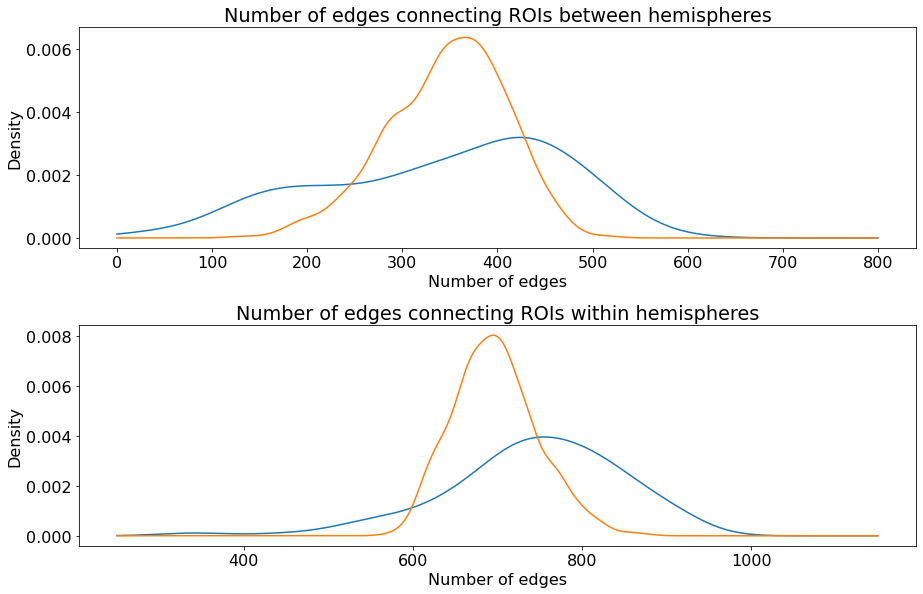

In [9]:
# No. of edges plots

intra_hemisphere_edges = np.where(outDetect.x[:, 0] == 1)[0]
inter_hemisphere_edges = np.where(outDetect.x[:, 0] == 0)[0]
a1 = np.sum(outDetect.a[intra_hemisphere_edges, :], 0).reshape(n)
a2 = np.sum(outDetect.a[inter_hemisphere_edges, :], 0).reshape(n)

x1 = np.arange(0, 800, 0.1)
density_intra_out = kde.gaussian_kde(a1[out])(x1)
density_intra_in = kde.gaussian_kde(a1[ins])(x1)

x2 = np.arange(250, 1150, 0.1)
density_inter_out = kde.gaussian_kde(a2[out])(x2)
density_inter_in = kde.gaussian_kde(a2[ins])(x2)

plt.rcParams["figure.figsize"] = (15, 9)
plt.rcParams.update({'font.size': 16})

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(bottom=0.1, top=0.9, hspace=0.35)

ax1.plot(x1, density_intra_out)
ax1.plot(x1, density_intra_in)
ax1.set_xlabel("Number of edges")
ax1.set_ylabel("Density")
ax1.set_title("Number of edges connecting ROIs between hemispheres")

ax2.plot(x2, density_inter_out)
ax2.plot(x2, density_inter_in)
ax2.set_xlabel("Number of edges")
ax2.set_ylabel("Density")
ax2.set_title("Number of edges connecting ROIs within hemispheres")

plt.show()